In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 39ms/step - loss: 0.6925 - accuracy: 0.5466 - val_loss: 0.6916 - val_accuracy: 0.5932
Epoch 2/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6903 - accuracy: 0.6116 - val_loss: 0.6886 - val_accuracy: 0.6352
Epoch 3/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6833 - accuracy: 0.6451 - val_loss: 0.6723 - val_accuracy: 0.6220
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6418 - accuracy: 0.6931 - val_loss: 0.6267 - val_accuracy: 0.7128
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6100 - accuracy: 0.7268 - val_loss: 0.6054 - val_accuracy: 0.7318
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5894 - accuracy: 0.7426 - val_loss: 0.5869 - val_accuracy: 0.7466
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5708 - accuracy: 0.7552 - val_loss: 0.5691 - val_ac

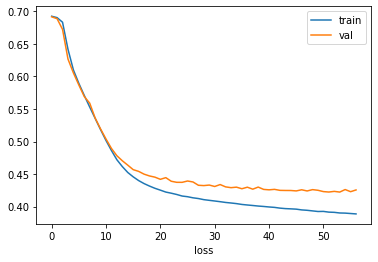

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.xlabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
#dropout
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 42ms/step - loss: 0.6927 - accuracy: 0.5181 - val_loss: 0.6923 - val_accuracy: 0.5418
Epoch 2/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6912 - accuracy: 0.5643 - val_loss: 0.6904 - val_accuracy: 0.5828
Epoch 3/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6882 - accuracy: 0.6097 - val_loss: 0.6864 - val_accuracy: 0.6126
Epoch 4/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6801 - accuracy: 0.6349 - val_loss: 0.6725 - val_accuracy: 0.6032
Epoch 5/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6386 - accuracy: 0.6644 - val_loss: 0.6106 - val_accuracy: 0.7142
Epoch 6/100
313/313 [==============================] - 12s 40ms/step - loss: 0.5911 - accuracy: 0.7371 - val_loss: 0.5829 - val_accuracy: 0.7366
Epoch 7/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5688 - accuracy: 0.7503 - val_loss: 0.5642 - val_ac

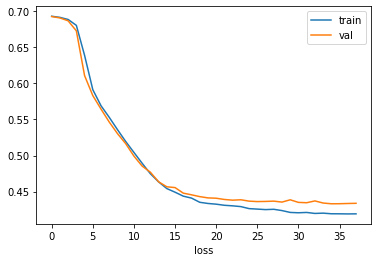

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.xlabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
#connecting RNN
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1,activation='sigmoid'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 28s 79ms/step - loss: 0.6929 - accuracy: 0.5191 - val_loss: 0.6926 - val_accuracy: 0.5280
Epoch 2/100
313/313 [==============================] - 24s 76ms/step - loss: 0.6913 - accuracy: 0.5653 - val_loss: 0.6898 - val_accuracy: 0.6198
Epoch 3/100
313/313 [==============================] - 24s 76ms/step - loss: 0.6852 - accuracy: 0.6403 - val_loss: 0.6792 - val_accuracy: 0.6474
Epoch 4/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6577 - accuracy: 0.6651 - val_loss: 0.6268 - val_accuracy: 0.6744
Epoch 5/100
313/313 [==============================] - 24s 78ms/step - loss: 0.5846 - accuracy: 0.7041 - val_loss: 0.5549 - val_accuracy: 0.7286
Epoch 6/100
313/313 [==============================] - 24s 76ms/step - loss: 0.5441 - accuracy: 0.7315 - val_loss: 0.5274 - val_accuracy: 0.7450
Epoch 7/100
313/313 [==============================] - 24s 77ms/step - loss: 0.5234 - accuracy: 0.7485 - val_loss: 0.5125 - val_ac

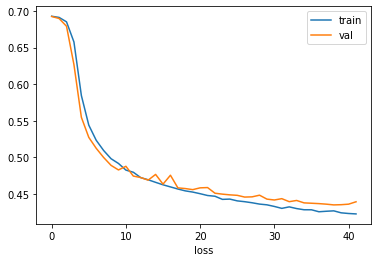

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.xlabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
#GRU
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation='sigmoid'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 45ms/step - loss: 0.6926 - accuracy: 0.5282 - val_loss: 0.6919 - val_accuracy: 0.5544
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6906 - accuracy: 0.5745 - val_loss: 0.6896 - val_accuracy: 0.5910
Epoch 3/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6874 - accuracy: 0.6063 - val_loss: 0.6859 - val_accuracy: 0.6040
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6818 - accuracy: 0.6197 - val_loss: 0.6794 - val_accuracy: 0.6110
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6722 - accuracy: 0.6349 - val_loss: 0.6675 - val_accuracy: 0.6286
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6542 - accuracy: 0.6536 - val_loss: 0.6447 - val_accuracy: 0.6570
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6153 - accuracy: 0.6826 - val_loss: 0.5922 - val_ac

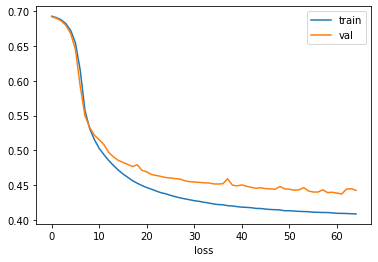

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.xlabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 11s 13ms/step - loss: 0.4349 - accuracy: 0.7964


[0.4348848760128021, 0.7964400053024292]